## Multi class image classification

In [ ]:
### here, in this file I will just build a baseline model and try to predict our dataset
### of the images, then afterwards I will use some transfer learning and see the results on the same

### ---------------loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential, load_model

### -------------loading the data

In [18]:
X_train = np.load('../data/preprocessed/train/X_train.npy')
y_train = np.load('../data/preprocessed/train/y_train.npy')

In [19]:
X_test = np.load('../data/preprocessed/test/X_test.npy')
y_test = np.load('../data/preprocessed/test/y_test.npy')

In [20]:
print(f"{X_train.shape} : {y_train.shape} :: {X_test.shape} : {y_test.shape}")

(4223, 224, 224, 3) : (4223,) :: (1408, 224, 224, 3) : (1408,)


### -----------------making a baseline model

In [13]:
model = Sequential()

In [14]:
model = Sequential([
    Conv2D(64, activation = 'relu', kernel_size = (3, 3), input_shape = (224, 224, 3)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, activation = 'relu', kernel_size = (3, 3)),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(128, kernel_size = (3, 3), activation = 'relu'),
    Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Flatten(),
    Dense(128, activation = 'elu'),
    Dense(4, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 

In [15]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 22, 22, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,436,484 (5.48 MB)

 Trainable params: 1,436,484 (5.48 MB)

 Non-trainable params: 0 (0.00 B)

### training and predictions

In [16]:
model.fit(X_train, y_train, epochs = 3, batch_size = 128, validation_split = 0.1)

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 207s 5s/step - accuracy: 0.4527 - loss: 1.0434 - val_accuracy: 0.6950 - val_loss: 0.5972
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - accuracy: 0.7109 - loss: 0.5028 - val_accuracy: 0.6690 - val_loss: 0.4722
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 154s 5s/step - accuracy: 0.7132 - loss: 0.5256 - val_accuracy: 0.7352 - val_loss: 0.4877


In [17]:
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 257ms/step


In [19]:
y_pred

array([[3.6840085e-02, 1.4163485e-04, 9.3384594e-02, 8.6963373e-01],
       [3.2154869e-03, 6.1070758e-05, 5.4058611e-01, 4.5613736e-01],
       [5.7656234e-03, 6.8486428e-05, 3.9088380e-01, 6.0328215e-01],
       ...,
       [9.5436418e-01, 4.3987732e-02, 4.0591672e-06, 1.6440531e-03],
       [9.6590114e-01, 3.2932159e-02, 1.7560052e-06, 1.1649241e-03],
       [9.4180846e-01, 3.8620461e-02, 2.4046110e-04, 1.9330529e-02]],
      dtype=float32)

In [20]:
y_pred = np.argmax(y_pred, axis = 1)

In [21]:
y_pred

array([3, 2, 3, ..., 0, 0, 0], dtype=int64)

### metrices and graphs

In [3]:
### I am not gonna put this code in the function because of the lack of the resources,
### the training time a a lot.

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9886363636363636
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       419
           1       1.00      1.00      1.00       237
           2       1.00      0.98      0.99       364
           3       0.97      0.98      0.98       388

    accuracy                           0.99      1408
   macro avg       0.99      0.99      0.99      1408
weighted avg       0.99      0.99      0.99      1408



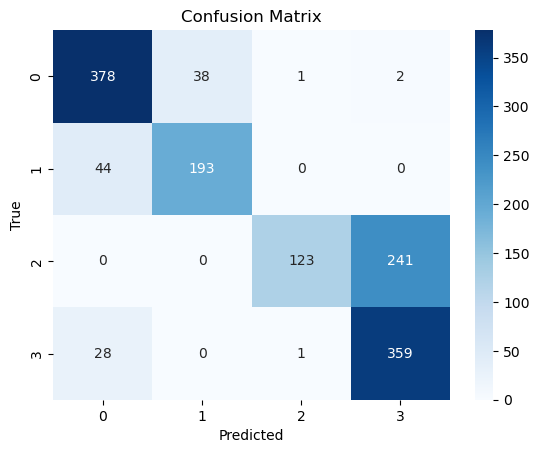

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### saving the model

In [25]:
model.save('../models/baseline.h5')

### --------------------using the transfer learning model

In [2]:
### so I am basically gonna use MobileNetV2 a pre trained model for this dataset
### the model is already trained on millions of images, but
### what I need to change is the part that, the original model is trained to predict for the 1000 of images at once
### but I only need it to predict on my 4 classes

In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

In [11]:
base_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

In [8]:
# base_model.summary()

In [12]:
for layer in base_model.layers : 
    layer.trainable = False

In [13]:
X = base_model.output
X = GlobalAveragePooling2D()(X)
X = Dense(128, activation = 'relu')(X)
output = Dense(4, activation = 'softmax')(X)

In [15]:
model = Model(inputs = base_model.inputs, outputs =  output)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
# model.summary()

In [22]:
model.fit(X_train, y_train, batch_size = 128, epochs = 10, validation_split = 0.10)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9875 - loss: 0.0437 - val_accuracy: 0.9811 - val_loss: 0.0464
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9935 - loss: 0.0332 - val_accuracy: 0.9858 - val_loss: 0.0426
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9932 - loss: 0.0298 - val_accuracy: 0.9858 - val_loss: 0.0419
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9937 - loss: 0.0267 - val_accuracy: 0.9882 - val_loss: 0.0383
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9933 - loss: 0.0231 - val_accuracy: 0.9905 - val_loss: 0.0304
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9953 - loss: 0.0192 - val_accuracy: 0.9882 - val_loss: 0.0320
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9955 - loss: 0.0174 - val_accuracy: 0.9882 - val_loss: 0.0394
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9950 - loss: 0.0163 - val_accuracy: 0.9929 - val_loss:

In [23]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 393ms/step


In [25]:
# y_pred

In [27]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9886363636363636
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       419
           1       1.00      1.00      1.00       237
           2       1.00      0.98      0.99       364
           3       0.97      0.98      0.98       388

    accuracy                           0.99      1408
   macro avg       0.99      0.99      0.99      1408
weighted avg       0.99      0.99      0.99      1408



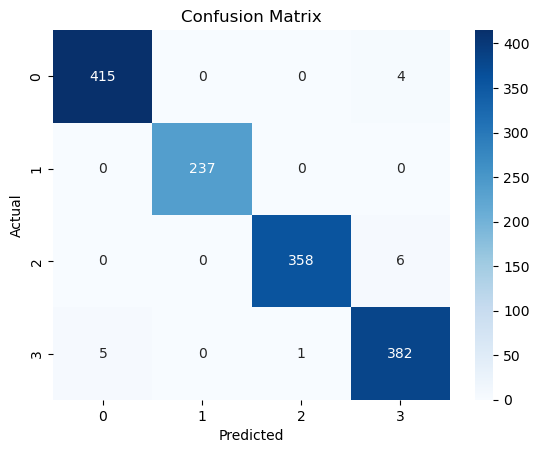

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ---------------checking the layers of the models side by side

In [31]:
baseline_model = load_model('../models/baseline.h5')

In [32]:
def show_layers(model) : 
    for i, layer in enumerate(model.layers) : 
        print(f"{i} : {layer} : {layer.name}")

In [33]:
show_layers(baseline_model)

0 : <Conv2D name=conv2d_5, built=True> : conv2d_5
1 : <MaxPooling2D name=max_pooling2d_4, built=True> : max_pooling2d_4
2 : <Conv2D name=conv2d_6, built=True> : conv2d_6
3 : <MaxPooling2D name=max_pooling2d_5, built=True> : max_pooling2d_5
4 : <Conv2D name=conv2d_7, built=True> : conv2d_7
5 : <MaxPooling2D name=max_pooling2d_6, built=True> : max_pooling2d_6
6 : <Conv2D name=conv2d_8, built=True> : conv2d_8
7 : <Conv2D name=conv2d_9, built=True> : conv2d_9
8 : <MaxPooling2D name=max_pooling2d_7, built=True> : max_pooling2d_7
9 : <Flatten name=flatten_1, built=True> : flatten_1
10 : <Dense name=dense_2, built=True> : dense_2
11 : <Dense name=dense_3, built=True> : dense_3


In [34]:
show_layers(base_model)

0 : <InputLayer name=input_layer_1, built=True> : input_layer_1
1 : <Conv2D name=Conv1, built=True> : Conv1
2 : <BatchNormalization name=bn_Conv1, built=True> : bn_Conv1
3 : <ReLU name=Conv1_relu, built=True> : Conv1_relu
4 : <DepthwiseConv2D name=expanded_conv_depthwise, built=True> : expanded_conv_depthwise
5 : <BatchNormalization name=expanded_conv_depthwise_BN, built=True> : expanded_conv_depthwise_BN
6 : <ReLU name=expanded_conv_depthwise_relu, built=True> : expanded_conv_depthwise_relu
7 : <Conv2D name=expanded_conv_project, built=True> : expanded_conv_project
8 : <BatchNormalization name=expanded_conv_project_BN, built=True> : expanded_conv_project_BN
9 : <Conv2D name=block_1_expand, built=True> : block_1_expand
10 : <BatchNormalization name=block_1_expand_BN, built=True> : block_1_expand_BN
11 : <ReLU name=block_1_expand_relu, built=True> : block_1_expand_relu
12 : <ZeroPadding2D name=block_1_pad, built=True> : block_1_pad
13 : <DepthwiseConv2D name=block_1_depthwise, built=Tru

In [35]:
show_layers(model)

0 : <InputLayer name=input_layer_1, built=True> : input_layer_1
1 : <Conv2D name=Conv1, built=True> : Conv1
2 : <BatchNormalization name=bn_Conv1, built=True> : bn_Conv1
3 : <ReLU name=Conv1_relu, built=True> : Conv1_relu
4 : <DepthwiseConv2D name=expanded_conv_depthwise, built=True> : expanded_conv_depthwise
5 : <BatchNormalization name=expanded_conv_depthwise_BN, built=True> : expanded_conv_depthwise_BN
6 : <ReLU name=expanded_conv_depthwise_relu, built=True> : expanded_conv_depthwise_relu
7 : <Conv2D name=expanded_conv_project, built=True> : expanded_conv_project
8 : <BatchNormalization name=expanded_conv_project_BN, built=True> : expanded_conv_project_BN
9 : <Conv2D name=block_1_expand, built=True> : block_1_expand
10 : <BatchNormalization name=block_1_expand_BN, built=True> : block_1_expand_BN
11 : <ReLU name=block_1_expand_relu, built=True> : block_1_expand_relu
12 : <ZeroPadding2D name=block_1_pad, built=True> : block_1_pad
13 : <DepthwiseConv2D name=block_1_depthwise, built=Tru

### saving the other 2 models

In [37]:
model.save('../models/modified_mobile_net.h5')

In [38]:
base_model.save('../models/base_mobile_net.h5')